In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
# import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

rwd_node = 116
frame_rate = 30 # Hz

In [3]:
# List number of bouts for each animal
print('mouse  bouts')
to=0
max_bouts = 0
for nickname in AllNames:
    tf = LoadTraj(nickname+'-tf')
    print(nickname+'     ',len(tf.no))
    
    if len(tf.no) > max_bouts:
        max_bouts = len(tf.no)
        
    to+=len(tf.no)
print('Total  ',to)
print('Max    ',max_bouts)

mouse  bouts
B1      104
B2      166
B3      147
B4      238
C1      173
C3      339
C6      150
C7      135
C8      164
C9      127
B5      245
B6      223
B7      204
D3      245
D4      319
D5      180
D6      59
D7      150
D8      109
D9      102
Total   3579
Max     339


In [30]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')

In [4]:
shape(tf.no), shape(tf.no[0])

/home/homero/software/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


((102,), (1, 2))

In [19]:
bout = 10
# frames in the bout when they visited the rwd_node
tf.no[bout][tf.no[bout][:,0]==rwd_node][:,1]

array([], dtype=int64)

Text(0.5, 0, 'Bout number')

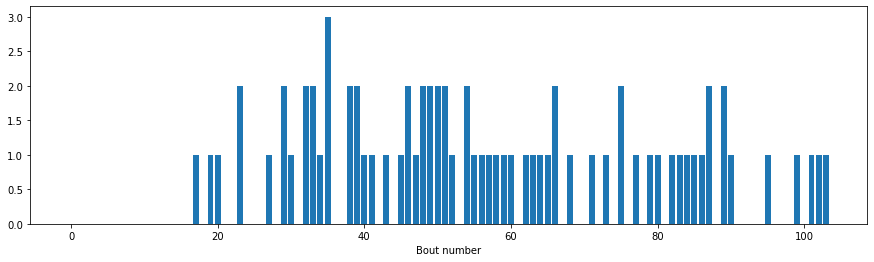

In [38]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')
n_bouts = len(tf.no)

figure(figsize=(15,4))
bar(range(n_bouts), [len(tf.re[bout]) for bout in range(n_bouts)])  # apparently D9 and D6 have empty lists at tf.re
xlabel("Bout number")
ylabel()

In [26]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')

for bout in range(len(tf.no)):
    print("Bout: %2d; visits to water port: %d" % (bout, sum(tf.no[bout][:,0]==rwd_node)))

Bout:  0; visits to water port: 0
Bout:  1; visits to water port: 0
Bout:  2; visits to water port: 0
Bout:  3; visits to water port: 0
Bout:  4; visits to water port: 0
Bout:  5; visits to water port: 0
Bout:  6; visits to water port: 0
Bout:  7; visits to water port: 0
Bout:  8; visits to water port: 0
Bout:  9; visits to water port: 0
Bout: 10; visits to water port: 0
Bout: 11; visits to water port: 0
Bout: 12; visits to water port: 0
Bout: 13; visits to water port: 0
Bout: 14; visits to water port: 0
Bout: 15; visits to water port: 0
Bout: 16; visits to water port: 0
Bout: 17; visits to water port: 6
Bout: 18; visits to water port: 0
Bout: 19; visits to water port: 6
Bout: 20; visits to water port: 2
Bout: 21; visits to water port: 0
Bout: 22; visits to water port: 0
Bout: 23; visits to water port: 2
Bout: 24; visits to water port: 0
Bout: 25; visits to water port: 0
Bout: 26; visits to water port: 0
Bout: 27; visits to water port: 2
Bout: 28; visits to water port: 0
Bout: 29; visi

Text(0, 0.5, 'Count')

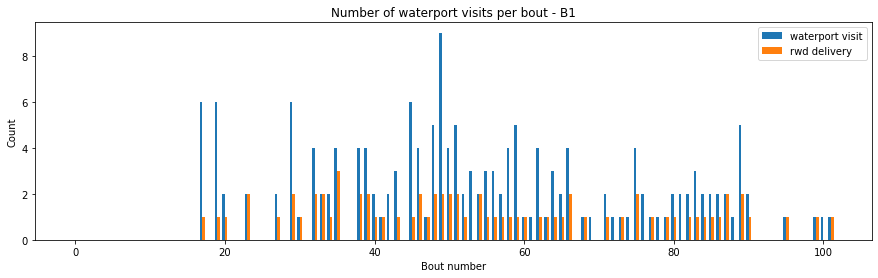

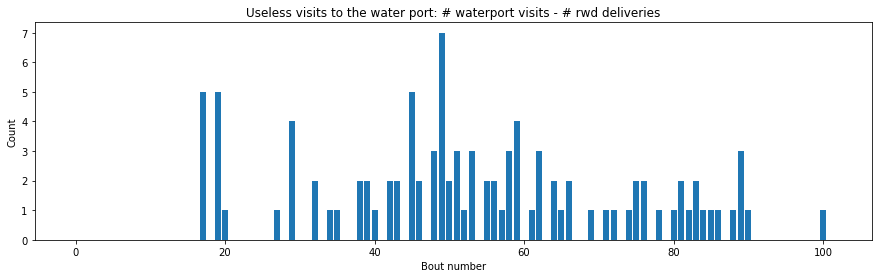

In [27]:
waterport_visits = [sum(tf.no[bout][:,0]==rwd_node) for bout in range(n_bouts)]
rwd_deliveries = [len(tf.re[bout]) for bout in range(n_bouts)]

figure(figsize=(15,4))
width = .35
bar(arange(n_bouts)-width/2, waterport_visits, width, label='waterport visit')
bar(arange(n_bouts)+width/2, rwd_deliveries, width, label='rwd delivery')
xlabel('Bout number')
ylabel('Count')
# xlim(0,100)
title('Number of waterport visits per bout - %s' % nickname)
legend()

useless_visits = array(waterport_visits)-(rwd_deliveries)
figure(figsize=(15,4))
title('Useless visits to the water port: # waterport visits - # rwd deliveries')
bar(arange(n_bouts), useless_visits)
xlabel('Bout number')
ylabel('Count')

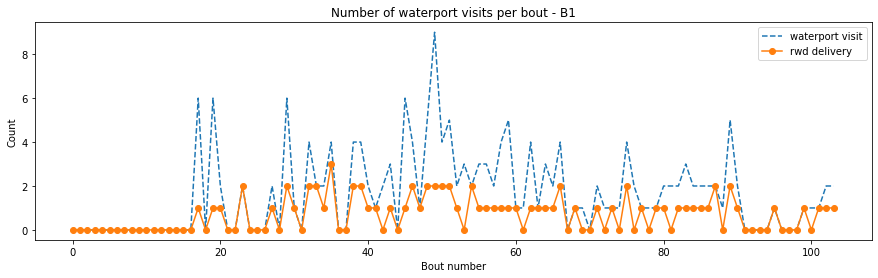

In [110]:
figure(figsize=(15,4))
width = .35
plt.plot(arange(n_bouts), waterport_visits, '--', label='waterport visit')
plt.plot(arange(n_bouts), rwd_deliveries, '-o', label='rwd delivery')
xlabel('Bout number')
ylabel('Count')
# xlim(0,100)
title('Number of waterport visits per bout - %s' % nickname)
legend()

In [94]:
import random as ran

Text(0, 0.5, 'rwd deliveries')

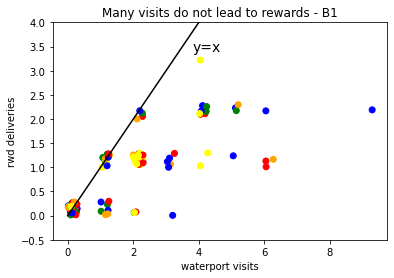

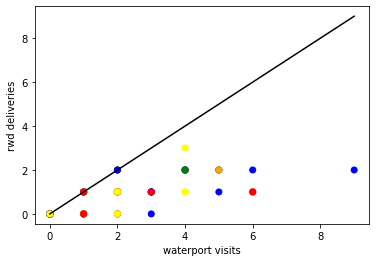

In [99]:
colors = ['red', 'green', 'blue', 'orange', 'yellow']
n_bouts = len(waterport_visits)
cs = random.choice(colors, n_bouts)
# cs = ['red', 'green', 'blue', 'orange', 'yellow']*34+['red', 'green', 'blue']

noise_lvl = .3
figure()
title("Many visits do not lead to rewards - %s" % nickname)
scatter(array(waterport_visits)+random.rand(n_bouts)*noise_lvl, array(rwd_deliveries)+random.rand(n_bouts)*noise_lvl, color=cs)
plt.plot(arange(10), arange(10), 'k')
xlabel('waterport visits')
ylabel('rwd deliveries')
text(3.8,3.4,"y=x", fontsize=14)
ylim(-.5, 4)

figure()
scatter(array(waterport_visits), array(rwd_deliveries), color=cs)
plt.plot(arange(10), arange(10), 'k')
xlabel('waterport visits')
ylabel('rwd deliveries')

In [23]:
nickname = "C1"
tf=LoadTraj(nickname+'-tf')

Text(0.5, 0, 'Bout')

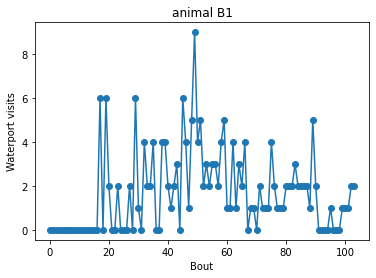

In [40]:
rwd_visits_in_bouts = [sum(tf.no[bout][:,0]==rwd_node) for bout in arange(len(tf.no))]
plt.plot(arange(len(tf.no)), rwd_visits_in_bouts, 'o-')
plt.title('animal %s' % nickname)
plt.ylabel("Waterport visits")
plt.xlabel("Bout")

# Waterport visit intervals

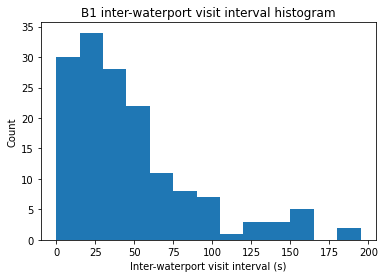

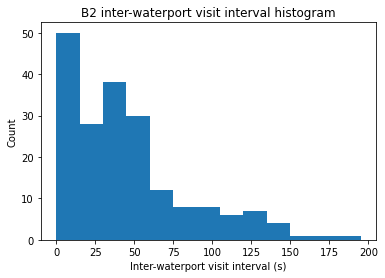

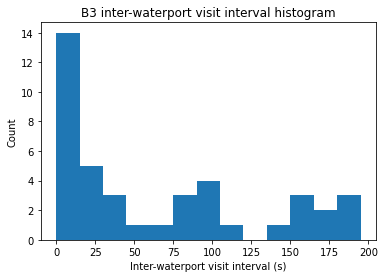

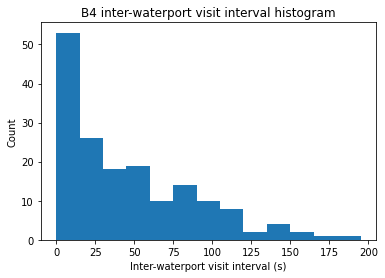

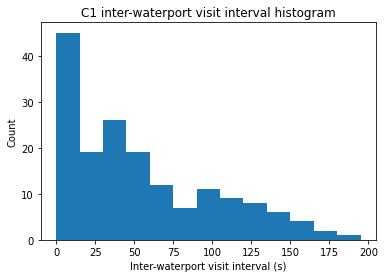

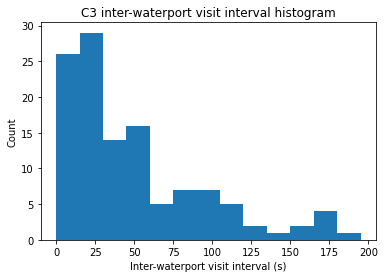

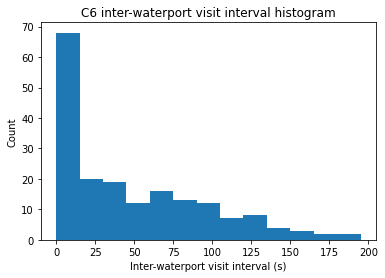

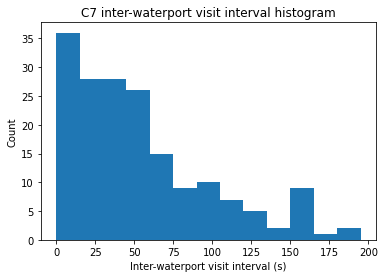

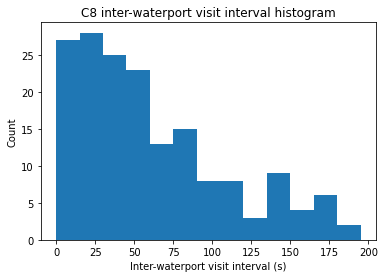

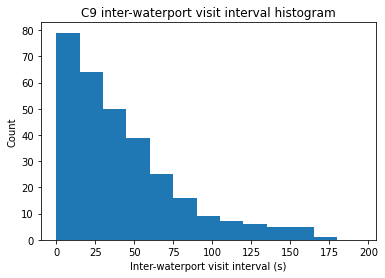

In [76]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    
    # calculate waterport visits
    frs_to_waterport_visits = []
    for bout in range(n_bouts):
        rwd_node_visits_frs = tf.no[bout][tf.no[bout][:,0]==rwd_node]
        if len(rwd_node_visits)>0:
            bout_init_fr = tf.fr[bout,0]
            frs_to_waterport_visits.append(bout_init_fr + rwd_node_visits_frs[:,1])

    frs_to_waterport_visits = np.concatenate(frs_to_waterport_visits)

    mazetimes_to_waterport_visits = np.array([TimeInMaze(frame_to_waterport_visit,tf) 
                                             for frame_to_waterport_visit in frs_to_waterport_visits])
    times_to_waterport_visits = np.array([frame_to_waterport_visit / frame_rate 
                                             for frame_to_waterport_visit in frs_to_waterport_visits])
    
    plt.figure()
    plt.hist(times_to_waterport_visits[1:]-times_to_waterport_visits[:-1], bins=arange(0,200, 15))
    plt.title("%s inter-waterport visit interval histogram" % nickname)
    plt.xlabel('Inter-waterport visit interval (s)')
    plt.ylabel('Count')
#     ylim(0,100)
#     plt.figure()
#     plt.hist(mazetimes_to_waterport_visits[1:]-mazetimes_to_waterport_visits[:-1], bins=arange(0,200, 15), color='g')
#     plt.title("%s inter-waterport visit mazetime interval histogram" % nickname)
#     plt.xlabel('Inter-waterport visit interval (s)')
#     plt.ylabel('Count')
# #     ylim(0,100)

# Reward delivery intervals

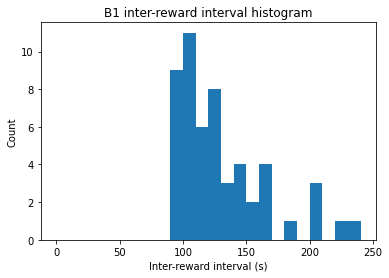

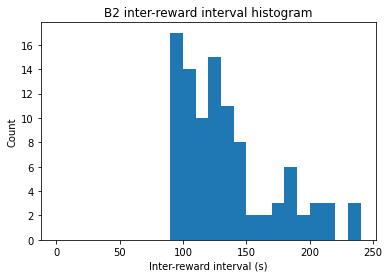

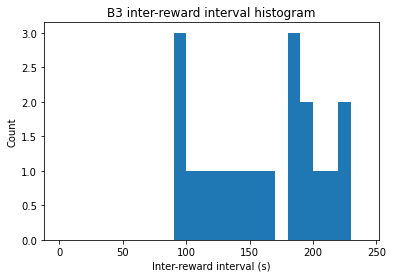

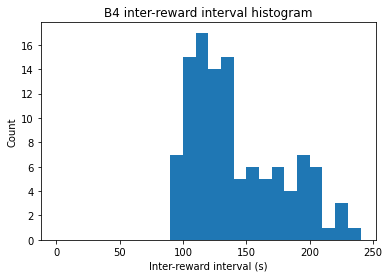

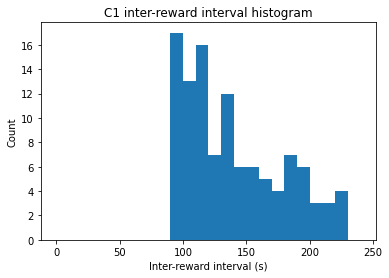

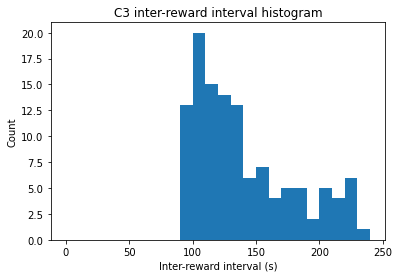

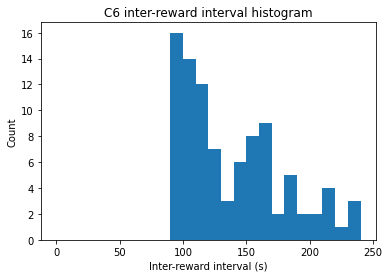

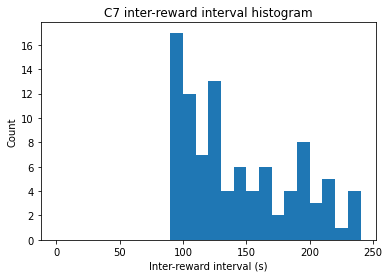

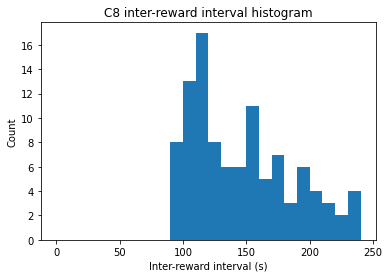

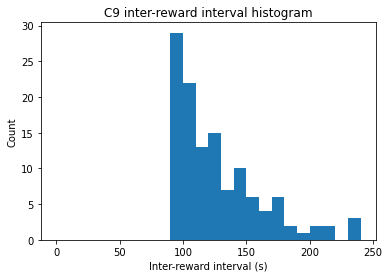

In [77]:
for nickname in RewNames:
# for nickname in AllNames:  # there is some error, gotta check later
    tf=LoadTraj(nickname+'-tf')
    # get all reward deliveries from all bouts
    frames_to_rwd = np.array([s_e_frs_of_each_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) 
                                                                                        for s_e_frs_of_each_rwd in frs_rwd])
#     mazetimes_to_rwd = np.array([TimeInMaze(frame_to_rwd,tf) for frame_to_rwd in frames_to_rwd])
    times_to_rwd = np.array([frame_to_rwd/frame_rate for frame_to_rwd in frames_to_rwd])
    plt.figure()
#     plt.hist(mazetimes_to_rwd[1:]-mazetimes_to_rwd[:-1], bins=arange(0,200, 15))
    plt.hist(times_to_rwd[1:]-times_to_rwd[:-1], bins=arange(0,250, 10))
    plt.title("%s inter-reward interval histogram" % nickname)
    plt.xlabel('Inter-reward interval (s)')
    plt.ylabel('Count')

time on maze: there are times smaller than 90s. It means that the animal spent time at the home cage instead of at the maze.

In [112]:
nickname = "B1"
tf=LoadTraj(nickname+'-tf')

# calculate waterport visits
frs_to_waterport_visits = []
for bout in range(n_bouts):
    rwd_node_visits_frs = tf.no[bout][tf.no[bout][:,0]==rwd_node]
    if len(rwd_node_visits)>0:
        bout_init_fr = tf.fr[bout,0]
        frs_to_waterport_visits.append(bout_init_fr + rwd_node_visits_frs[:,1])

frs_to_waterport_visits = np.concatenate(frs_to_waterport_visits)

times_to_waterport_visits = np.array([frame_to_waterport_visit / frame_rate 
                                         for frame_to_waterport_visit in frs_to_waterport_visits])

frames_to_rwd = np.array([s_e_frs_of_each_rwd[0]+tf.fr[bout_idx,0] for bout_idx, frs_rwd in enumerate(tf.re) 
                                                                                        for s_e_frs_of_each_rwd in frs_rwd])
times_to_rwd = np.array([frame_to_rwd/frame_rate for frame_to_rwd in frames_to_rwd])



times_to_waterport_visits[0:5], times_to_rwd[0:5]#, tf.no[-1][:,0]==rwd_node

(array([6711.7       , 6719.63333333, 6720.26666667, 6720.56666667,
        6732.33333333]),
 array([6714.56666667, 7136.16666667, 7345.1       , 7727.1       ,
        7852.53333333]))

In [127]:
all_waterport_visits=[]
waterport_visits_in_between_rwds = []

rwd_i = 0
for waterport_visit_time in times_to_waterport_visits:
#     print('wp ', waterport_visit_time)
    
    if waterport_visit_time < times_to_rwd[rwd_i]:
        waterport_visits_in_between_rwds.append(waterport_visit_time)
    else:
        print('wp ', waterport_visits_in_between_rwds)
        print('rwd ', times_to_rwd[rwd_i])
        rwd_i+=1
        all_waterport_visits.append(waterport_visits_in_between_rwds)
        waterport_visits_in_between_rwds = []
            
# all_waterport_visits

wp  [6711.7]
rwd  6714.566666666667
wp  [6720.266666666666, 6720.566666666667, 6732.333333333333, 6738.633333333333, 7134.2]
rwd  7136.166666666667
wp  [7148.833333333333, 7166.766666666666, 7172.7, 7187.166666666667, 7343.533333333334]
rwd  7345.1
wp  [7726.1]
rwd  7727.1
wp  []
rwd  7852.533333333334
wp  []
rwd  8340.066666666668
wp  [8624.566666666668]
rwd  8625.766666666666
wp  []
rwd  8727.8
wp  [8741.033333333333, 8741.433333333332, 8743.3, 9036.066666666668]
rwd  9037.066666666668
wp  []
rwd  9367.633333333333
wp  [9418.233333333334, 9471.466666666667]
rwd  9472.233333333334
wp  []
rwd  9617.433333333332
wp  []
rwd  9779.8
wp  []
rwd  9964.6
wp  [10223.9]
rwd  10224.6
wp  []
rwd  10325.266666666666
wp  [10432.566666666668]
rwd  10433.266666666666
wp  []
rwd  10728.633333333333
wp  [10818.266666666666]
rwd  10818.966666666667
wp  [10912.0]
rwd  10912.633333333333
wp  [11020.533333333333]
rwd  11021.166666666666
wp  [11313.233333333334]
rwd  11313.833333333334
wp  [11440.133333333

In [105]:
[el in (rwd_node,57) for el in tf.no[-1][:,0]]  # 57 is the node next to the rwd_node

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [97]:
[el in (rwd_node, 57) for el in tf.no[bout][:,0]] 
bout_init_fr + rwd_node_visits_frs[:,1], 
rwd_node_visits_frs + np.array([[0, 1],[0,1]])*bout_init_fr

array([[   116, 557384],
       [   116, 560657]])